# Dynamic QR Code 

This notebook is my proposal on how to make the dynamic QR solution using SQL Server (to build the Items Table), the SQL Server agent (for the trigger when a row is updated) and Python or another third party to generate the QR Code

## Database Structure 

- Items table: create the Items table which should contain:
    - UID (Unique Identifier for each item)
    - Item Name (The name of the Item in question)
    - Item Website URL (the ovedecors.com URL for the Item in question)

#### Sample Structure 


In [ ]:
CREATE TABLE Items (
    ItemUID UNIQUEIDENTIFIER PRIMARY KEY,
    ItemName NVARCHAR(MAX),
    ItemURL NVARCHAR(MAX)
);

-- And in case you want to store the QR Codes in another table then:

CREATE TABLE QRCode (
    ItemUID UNIQUEIDENTIFIER PRIMARY KEY,
    QRCodeImage VARBINARY(MAX), -- For binary data
    QRCodeURL NVARCHAR(MAX),    -- If storing as a URL
    FOREIGN KEY (ItemUID) REFERENCES Items(ItemUID)
);

## Dynamic QR Code generation 

My proposal is to generate the QR Code using the python libray 
    pip install qrcode[pil]

Which is a popular library used for QR Code generation 


In [ ]:
import qrcode

# URL to generate QR code for
url = "https://www.example.com"

# Generate QR code
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)

qr.add_data(url)
qr.make(fit=True)

# Create an image from the QR Code instance
img = qr.make_image(fill_color="black", back_color="white")

# Save the image
img.save("item_qr.png")


The above is a basic example on how to generate a basic QR Code for a given URL using python 

#### Integrating the QR Code Generation above to work with SQL Server

In Order to integrate the code above with our SQL Solution we would have to:

- Fetch URLs from the Database: Modify the script to connect to your SQL Server database (using **pyodbc** or **sqlalchemy**) and fetch the URLs that need QR codes.

- Generate QR Codes: Loop through the feteched URLs and generate the codes using the above logic or improved logic (this can be optimized and improved when implementing the solution for example having a flag such as **NeedsQRUpdate**)

- Store QR Codes (Optional): Depending on the use we want to give our table we can have another or in the same table a column to store the QR Codes 

## Scheduling with SQL Server Agent or Alternative solutions

- **Create a SQL Server Agent Job**: This job will execute the Python script at regular intervals.

   - **Job Type**: Choose "Operating System (CmdExec)" or use a PowerShell step if you prefer wrapping the Python call in a PowerShell script.

   - **Command**: Enter the command to run your Python script, such as python C:\path\to\your_script.py.
   
   - **Schedule**: Determine how frequently you need the job to run. This could be every few minutes, hourly, or daily, depending on how often your data changes.

- **Create a Task Scheduler task for the python script (TBD)** 

## Handling Table Updates 

- **Automated Trigger (TBD)**: We could find a python solution for this (It would probably use Schedules)

- **Manual Updates**: Have someone add the QR Code and the Item to the table

## Example Workflow 
- Add an Item or updater an Item on the Items table, (set NeedsQRUpdate flag to true in case we use the flags solution for it to be less intensive work)
- The SQL Server Agent job runs at its next scheduled time 
- The Python script, executed by the Agent job, fetches all items marked for QR Code updates (flag solution)
- For each Item, the script generates a new QR code, and updates the QR Table/column (if needed)
- The script resets the flag (NeedsQRUpdate)

-> **Reference Flow**

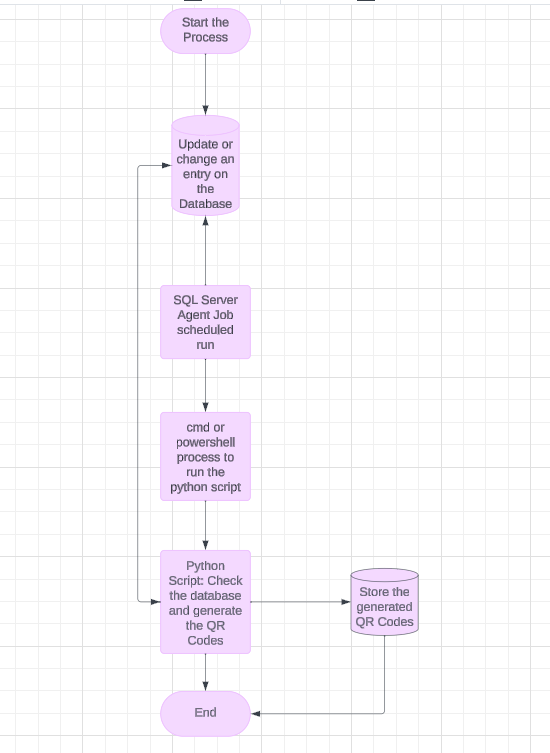

## Considerations
- Performance: Regularly assess the performance impact of this solution, especially if your dataset is large or the job runs frequently.
- Security: Ensure secure handling of database credentials within your Python script.